In [1]:
# pip install PyPDF2
# pip install PDFFileReader
# pip install pdf

import PyPDF2
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
import os

filename = "NH투자증권.pdf"
filepath = os.path.join("../pdf_to_text_min",filename)

# PDF의 Total 페이지를 읽어오기 
fp = open(filepath, 'rb')
total_pages = PyPDF2.PdfFileReader(fp).numPages

# pdfminer로 페이지별 텍스트 가져오기 
page_text = {}
for page_no in range(total_pages):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    device = TextConverter(rsrcmgr, retstr, laparams=LAParams())
    fb = open(filepath, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    caching = True
    maxpages = 0
    pagenos = [page_no]
    for page in PDFPage.get_pages(fb, pagenos, maxpages = maxpages, 
                              caching = caching, check_extractable = True):
        interpreter.process_page(page)
        page_text[page_no] = retstr.getvalue()
    fp.close()
    device.close()
    retstr.close()

In [2]:
import re

# 각 페이지의 내용을 \n나 \n\n 기준으로 split하여 담은 단어들의 리스트, page_word
page_word = []
word_len = []

# 보고서의 전체 페이지를 돌면서 \n나 \n\n 기준으로 나눠진 단어들을 page_word 리스트에 담아준다
# re.split하면서 빈 문자열('')이 page_word 리스트의 요소로 들어가는데, 이는 불필요하므로 page_word 리스트에 담지 않도록 한다
# 추후 단어들의 길이를 통해, 해당 단어가 문장(긴 단어의 경우 문자로 판단할 예정)인지, 표의 일부인지를 확인해야 하므로, 단어(word)의 길이도 수집한다
for page_num in range(len(page_text)):
    page_word.append([])
    split_temp = re.split('[\n|\n\n]', page_text[page_num])
    for word in split_temp:
        if word != '':
            page_word[page_num].append(word) 
            word_len.append(len(word))

In [4]:
page_word[20]

['021',
 'INTRODUCTION',
 'KEY HIGHLIGHTS',
 'TOWARDS THE ESG LEADERSHIP',
 'TOWARDS A SUSTAINABLE FUTURE',
 'APPENDIX',
 '함께하는 마을 만들기    NH투자증권은 ‘함께하는 마을 만들기’ 활동을 통해 지속적으로 농촌의 일손 돕기뿐만 ',
 '아니라 마을의 숙원사업과 농산물 직거래장터 등을 지원하는 등 실효적인 지원 활동을 펼치고 있습니다. 2021년에는 ',
 '코로나19 이슈로 인해 농촌을 직접 방문하기 어려운 상황이었으나 방문 횟수 33회, 참여 임직원 수 437명으로 전년 ',
 '대비 15% 감소한 방문 횟수를 기록하였습니다. 당사는 앞으로도 지역사회 내 유대관계를 바탕으로 사회적 책임을 ',
 '실천하고 나눔 공유의 활동을 지속할 예정입니다.',
 '함께하는 마을 만들기 활동 현황',
 '구분',
 '2019',
 '2020',
 '2021',
 '마을 수 (개)',
 '농촌방문 횟수 (회)',
 '참여직원 수(누적) (명)',
 '참여율 (%)',
 '32',
 '67',
 '1,661',
 '55',
 '30',
 '39',
 '1,807',
 '60',
 '31',
 '331)',
 '4371)',
 '15',
 '1) 코로나19 영향으로 참여직원 수와 대면 방문횟수는 감소하였음',
 '중소농가 육성 지원활동     NH투자증권은 중앙회 창업농지원센터, 농우바이오와 함께 중소농가를 육성하기 위해 ',
 '힘쓰고 있습니다. 그 방안으로 농가 상품판매 지원은 물론이고 한 걸음 더 나아가 현재 농촌이 직면한 현실과 이에 ',
 '도전하는 농업인들의 이야기를 소개하여 궁극적인 농가소득 증대에 기여하고 있습니다. 또한, 유통망의 다양화에 ',
 '따라 크라우드펀딩과 스마트스토어 등의 여러 온라인 유통망을 활용하도록 하여 더 실효적인 판로 개척을 지원하고 ',
 '있습니다. 크라우드펀딩은 올해로 6년째 이어지고 있으며, 펀딩금액, 연간 상품 공급능력, 농가의 

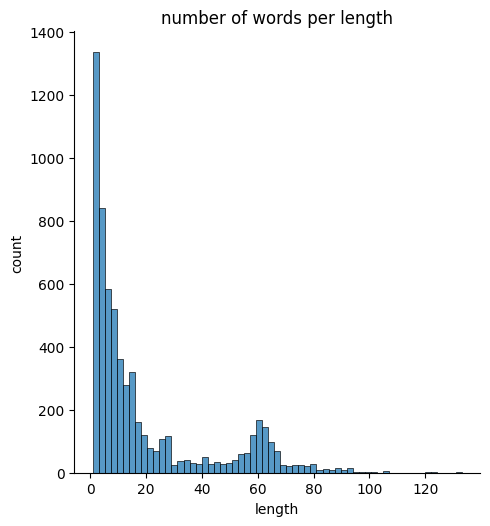

In [25]:
import seaborn as sns

sns.displot(word_len)
plt.title("number of words per length")
plt.xlabel("length")
plt.ylabel("count")
plt.show()

In [61]:
import pandas as pd

word_len_pd = pd.DataFrame(word_len)
word_len_pd.columns = ['length']

words_per_len = pd.DataFrame(word_len_pd['length'].value_counts())
words_per_len.reset_index(level=0, inplace=True)
words_per_len.columns = ['length', 'counts']
words_per_len.sort_values(['length'], inplace = True)
words_per_len.reset_index(drop = True, inplace = True)

pd.set_option('display.max_rows', None)
print(words_per_len)

     length  counts
0         1     728
1         2     363
2         3     244
3         4     432
4         5     409
5         6     275
6         7     307
7         8     246
8         9     274
9        10     170
10       11     190
11       12     172
12       13     107
13       14     144
14       15      83
15       16      93
16       17      82
17       18      79
18       19      66
19       20      55
20       21      45
21       22      32
22       23      32
23       24      38
24       25      28
25       26      78
26       27      17
27       28      73
28       29      28
29       30      10
30       31      15
31       32      25
32       33      13
33       34      11
34       35      28
35       36      14
36       37      17
37       38      13
38       39      14
39       40      25
40       41      16
41       42       9
42       43      16
43       44      13
44       45      18
45       46      17
46       47      13
47       48      16
48       49      18


In [52]:
Q1 = words_per_len['counts'].quantile(.25)
Q3 = words_per_len['counts'].quantile(.75)
IQR = Q3 - Q1
Q2 = words_per_len['counts'].quantile(.5)
Q4 = words_per_len['counts'].quantile(1)

print("Q1 =",Q1)
print("Q2 =",Q2)
print("Q3 =",Q3)
print("Q4 =",Q4)
print("IQR =",IQR)
print("Q2 =",Q2)

Q1 = 9.0
Q2 = 16.0
Q3 = 59.0
Q4 = 728.0
IQR = 50.0
Q2 = 16.0


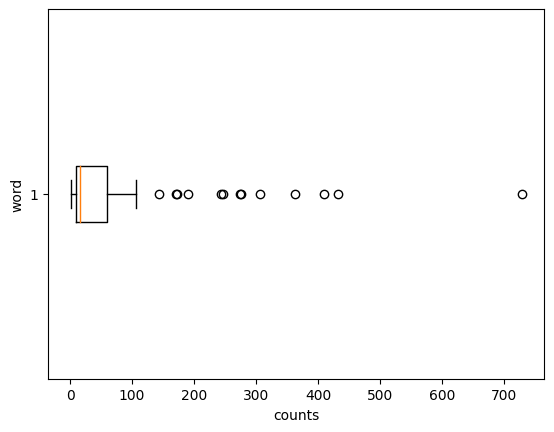

In [53]:
# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.boxplot(words_per_len['counts'], vert=0)
ax.set_xlabel('counts')
ax.set_ylabel('word')

plt.show()

In [13]:
page_text[20]

'021\n\nINTRODUCTION\n\nKEY HIGHLIGHTS\n\nTOWARDS THE ESG LEADERSHIP\n\nTOWARDS A SUSTAINABLE FUTURE\n\nAPPENDIX\n\n함께하는 마을 만들기    NH투자증권은 ‘함께하는 마을 만들기’ 활동을 통해 지속적으로 농촌의 일손 돕기뿐만 \n\n아니라 마을의 숙원사업과 농산물 직거래장터 등을 지원하는 등 실효적인 지원 활동을 펼치고 있습니다. 2021년에는 \n\n코로나19 이슈로 인해 농촌을 직접 방문하기 어려운 상황이었으나 방문 횟수 33회, 참여 임직원 수 437명으로 전년 \n\n대비 15% 감소한 방문 횟수를 기록하였습니다. 당사는 앞으로도 지역사회 내 유대관계를 바탕으로 사회적 책임을 \n\n실천하고 나눔 공유의 활동을 지속할 예정입니다.\n\n함께하는 마을 만들기 활동 현황\n\n구분\n\n2019\n\n2020\n\n2021\n\n마을 수 (개)\n\n농촌방문 횟수 (회)\n\n참여직원 수(누적) (명)\n\n참여율 (%)\n\n32\n\n67\n\n1,661\n\n55\n\n30\n\n39\n\n1,807\n\n60\n\n31\n\n331)\n\n4371)\n\n15\n\n1) 코로나19 영향으로 참여직원 수와 대면 방문횟수는 감소하였음\n\n중소농가 육성 지원활동     NH투자증권은 중앙회 창업농지원센터, 농우바이오와 함께 중소농가를 육성하기 위해 \n\n힘쓰고 있습니다. 그 방안으로 농가 상품판매 지원은 물론이고 한 걸음 더 나아가 현재 농촌이 직면한 현실과 이에 \n\n도전하는 농업인들의 이야기를 소개하여 궁극적인 농가소득 증대에 기여하고 있습니다. 또한, 유통망의 다양화에 \n\n따라 크라우드펀딩과 스마트스토어 등의 여러 온라인 유통망을 활용하도록 하여 더 실효적인 판로 개척을 지원하고 \n\n있습니다. 크라우드펀딩은 올해로 6년째 이어지고 있으며, 펀딩금액, 연간 상품 공급능력, 농가의 업무 협조 등을 \n\n고려한 우수 농가 선정 및 지원 사업 또한 진

# 윗쪽까지가 simple sol에서 이어받아서 수정한 내용

In [5]:
index_freq_list = []
index_loc_list = []
total_text = page_text[20]
start_point = 0
past_index = 0
index = 0

while(True):
    index = total_text.find('\n',start_point+1,len(total_text)-1)
    if index == -1:
        break
    
    start_point = index
    index_loc_list.append([past_index,index])
    index_freq_list.append(index-past_index)
    past_index = index
    
    

In [7]:
print(len(index_freq_list))
print(len(index_loc_list))

310
310


In [9]:
print(index_freq_list)

[3, 1, 13, 1, 15, 1, 27, 1, 29, 1, 9, 1, 63, 1, 65, 1, 67, 1, 63, 1, 27, 1, 18, 1, 3, 1, 5, 1, 5, 1, 5, 1, 9, 1, 12, 1, 15, 1, 8, 1, 3, 1, 3, 1, 6, 1, 3, 1, 3, 1, 3, 1, 6, 1, 3, 1, 3, 1, 5, 1, 6, 1, 3, 1, 37, 1, 63, 1, 64, 1, 61, 1, 62, 1, 64, 1, 65, 1, 66, 1, 60, 1, 62, 1, 34, 1, 22, 1, 3, 1, 5, 1, 5, 1, 5, 1, 9, 1, 7, 1, 12, 1, 12, 1, 8, 1, 3, 1, 6, 1, 5, 1, 6, 1, 4, 1, 3, 1, 6, 1, 5, 1, 6, 1, 4, 1, 26, 1, 3, 1, 5, 1, 5, 1, 9, 1, 12, 1, 12, 1, 8, 1, 2, 1, 5, 1, 5, 1, 4, 1, 3, 1, 6, 1, 5, 1, 6, 1, 4, 1, 2, 1, 4, 1, 5, 1, 4, 1, 62, 1, 59, 1, 60, 1, 61, 1, 16, 1, 23, 1, 6, 1, 7, 1, 8, 1, 3, 1, 8, 1, 22, 1, 12, 1, 35, 1, 3, 1, 11, 1, 3, 1, 5, 1, 5, 1, 5, 1, 6, 1, 64, 1, 60, 1, 63, 1, 39, 1, 3, 1, 9, 1, 9, 1, 9, 1, 5, 1, 5, 1, 5, 1, 5, 1, 22, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 2, 1, 3, 1, 3, 1, 4, 1, 2, 1, 18, 1, 66, 1, 6, 1, 13, 1, 6, 1, 14, 1, 13, 1, 59, 1, 68, 1, 60, 1, 33, 1, 8, 1, 67, 1, 66, 1, 67, 1, 67, 1, 61, 1, 64, 1, 58, 1, 62, 1, 65, 1, 64, 1, 59, 1, 59, 1, 62, 1]


In [7]:
print(index_loc_list)

[[0, 3], [3, 4], [4, 17], [17, 18], [18, 33], [33, 34], [34, 61], [61, 62], [62, 91], [91, 92], [92, 101], [101, 102], [102, 165], [165, 166], [166, 231], [231, 232], [232, 299], [299, 300], [300, 363], [363, 364], [364, 391], [391, 392], [392, 410], [410, 411], [411, 414], [414, 415], [415, 420], [420, 421], [421, 426], [426, 427], [427, 432], [432, 433], [433, 442], [442, 443], [443, 455], [455, 456], [456, 471], [471, 472], [472, 480], [480, 481], [481, 484], [484, 485], [485, 488], [488, 489], [489, 495], [495, 496], [496, 499], [499, 500], [500, 503], [503, 504], [504, 507], [507, 508], [508, 514], [514, 515], [515, 518], [518, 519], [519, 522], [522, 523], [523, 528], [528, 529], [529, 535], [535, 536], [536, 539], [539, 540], [540, 577], [577, 578], [578, 641], [641, 642], [642, 706], [706, 707], [707, 768], [768, 769], [769, 831], [831, 832], [832, 896], [896, 897], [897, 962], [962, 963], [963, 1029], [1029, 1030], [1030, 1090], [1090, 1091], [1091, 1153], [1153, 1154], [1154,

In [5]:
total_text

'021\n\nINTRODUCTION\n\nKEY HIGHLIGHTS\n\nTOWARDS THE ESG LEADERSHIP\n\nTOWARDS A SUSTAINABLE FUTURE\n\nAPPENDIX\n\n함께하는 마을 만들기    NH투자증권은 ‘함께하는 마을 만들기’ 활동을 통해 지속적으로 농촌의 일손 돕기뿐만 \n\n아니라 마을의 숙원사업과 농산물 직거래장터 등을 지원하는 등 실효적인 지원 활동을 펼치고 있습니다. 2021년에는 \n\n코로나19 이슈로 인해 농촌을 직접 방문하기 어려운 상황이었으나 방문 횟수 33회, 참여 임직원 수 437명으로 전년 \n\n대비 15% 감소한 방문 횟수를 기록하였습니다. 당사는 앞으로도 지역사회 내 유대관계를 바탕으로 사회적 책임을 \n\n실천하고 나눔 공유의 활동을 지속할 예정입니다.\n\n함께하는 마을 만들기 활동 현황\n\n구분\n\n2019\n\n2020\n\n2021\n\n마을 수 (개)\n\n농촌방문 횟수 (회)\n\n참여직원 수(누적) (명)\n\n참여율 (%)\n\n32\n\n67\n\n1,661\n\n55\n\n30\n\n39\n\n1,807\n\n60\n\n31\n\n331)\n\n4371)\n\n15\n\n1) 코로나19 영향으로 참여직원 수와 대면 방문횟수는 감소하였음\n\n중소농가 육성 지원활동     NH투자증권은 중앙회 창업농지원센터, 농우바이오와 함께 중소농가를 육성하기 위해 \n\n힘쓰고 있습니다. 그 방안으로 농가 상품판매 지원은 물론이고 한 걸음 더 나아가 현재 농촌이 직면한 현실과 이에 \n\n도전하는 농업인들의 이야기를 소개하여 궁극적인 농가소득 증대에 기여하고 있습니다. 또한, 유통망의 다양화에 \n\n따라 크라우드펀딩과 스마트스토어 등의 여러 온라인 유통망을 활용하도록 하여 더 실효적인 판로 개척을 지원하고 \n\n있습니다. 크라우드펀딩은 올해로 6년째 이어지고 있으며, 펀딩금액, 연간 상품 공급능력, 농가의 업무 협조 등을 \n\n고려한 우수 농가 선정 및 지원 사업 또한 진

In [11]:
min_val = sum(index_freq_list)/len(index_freq_list)
min_val

11.329032258064515

In [89]:
min_val = sum(index_freq_list)/len(index_freq_list)
pre_text = total_text[:]

for i in range(len(index_freq_list)):
    if index_freq_list[i]<min_val+10:
        start_point = index_loc_list[i][0]
        end_point = index_loc_list[i][1]
        
        if total_text[start_point:end_point] != "\n":
            pre_text = pre_text.replace(total_text[start_point:end_point],'')
            print("삭제 단어: ",total_text[start_point:end_point])
        else: 
            print("삭제 단어: 개행문자")

print(pre_text)

삭제 단어:  021
삭제 단어: 개행문자
삭제 단어:  
INTRODUCTION
삭제 단어: 개행문자
삭제 단어:  
KEY HIGHLIGHTS
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어:  
APPENDIX
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어:  
함께하는 마을 만들기 활동 현황
삭제 단어: 개행문자
삭제 단어:  
구분
삭제 단어: 개행문자
삭제 단어:  
2019
삭제 단어: 개행문자
삭제 단어:  
2020
삭제 단어: 개행문자
삭제 단어:  
2021
삭제 단어: 개행문자
삭제 단어:  
마을 수 (개)
삭제 단어: 개행문자
삭제 단어:  
농촌방문 횟수 (회)
삭제 단어: 개행문자
삭제 단어:  
참여직원 수(누적) (명)
삭제 단어: 개행문자
삭제 단어:  
참여율 (%)
삭제 단어: 개행문자
삭제 단어:  
32
삭제 단어: 개행문자
삭제 단어:  
67
삭제 단어: 개행문자
삭제 단어:  
1,661
삭제 단어: 개행문자
삭제 단어:  
55
삭제 단어: 개행문자
삭제 단어:  
30
삭제 단어: 개행문자
삭제 단어:  
39
삭제 단어: 개행문자
삭제 단어:  
1,807
삭제 단어: 개행문자
삭제 단어:  
60
삭제 단어: 개행문자
삭제 단어:  
31
삭제 단어: 개행문자
삭제 단어:  
331)
삭제 단어: 개행문자
삭제 단어:  
4371)
삭제 단어: 개행문자
삭제 단어:  
15
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어: 개행문자
삭제 단어:  
구분
삭제 단어: 개행문자
삭제 단어:  
2019
삭제 단어: 개행문자
삭제 단어:  
2020
삭제 단어: 개행문자
삭제 단

In [53]:
sum(index_freq_list)

3512

In [54]:
min_val = sum(index_freq_list)/len(index_freq_list)
print(min_val)

11.329032258064515


In [40]:
page_text[20]

'021\n\nINTRODUCTION\n\nKEY HIGHLIGHTS\n\nTOWARDS THE ESG LEADERSHIP\n\nTOWARDS A SUSTAINABLE FUTURE\n\nAPPENDIX\n\n함께하는 마을 만들기    NH투자증권은 ‘함께하는 마을 만들기’ 활동을 통해 지속적으로 농촌의 일손 돕기뿐만 \n\n아니라 마을의 숙원사업과 농산물 직거래장터 등을 지원하는 등 실효적인 지원 활동을 펼치고 있습니다. 2021년에는 \n\n코로나19 이슈로 인해 농촌을 직접 방문하기 어려운 상황이었으나 방문 횟수 33회, 참여 임직원 수 437명으로 전년 \n\n대비 15% 감소한 방문 횟수를 기록하였습니다. 당사는 앞으로도 지역사회 내 유대관계를 바탕으로 사회적 책임을 \n\n실천하고 나눔 공유의 활동을 지속할 예정입니다.\n\n함께하는 마을 만들기 활동 현황\n\n구분\n\n2019\n\n2020\n\n2021\n\n마을 수 (개)\n\n농촌방문 횟수 (회)\n\n참여직원 수(누적) (명)\n\n참여율 (%)\n\n32\n\n67\n\n1,661\n\n55\n\n30\n\n39\n\n1,807\n\n60\n\n31\n\n331)\n\n4371)\n\n15\n\n1) 코로나19 영향으로 참여직원 수와 대면 방문횟수는 감소하였음\n\n중소농가 육성 지원활동     NH투자증권은 중앙회 창업농지원센터, 농우바이오와 함께 중소농가를 육성하기 위해 \n\n힘쓰고 있습니다. 그 방안으로 농가 상품판매 지원은 물론이고 한 걸음 더 나아가 현재 농촌이 직면한 현실과 이에 \n\n도전하는 농업인들의 이야기를 소개하여 궁극적인 농가소득 증대에 기여하고 있습니다. 또한, 유통망의 다양화에 \n\n따라 크라우드펀딩과 스마트스토어 등의 여러 온라인 유통망을 활용하도록 하여 더 실효적인 판로 개척을 지원하고 \n\n있습니다. 크라우드펀딩은 올해로 6년째 이어지고 있으며, 펀딩금액, 연간 상품 공급능력, 농가의 업무 협조 등을 \n\n고려한 우수 농가 선정 및 지원 사업 또한 진

In [3]:
print(page_text[20])

021

INTRODUCTION

KEY HIGHLIGHTS

TOWARDS THE ESG LEADERSHIP

TOWARDS A SUSTAINABLE FUTURE

APPENDIX

함께하는 마을 만들기    NH투자증권은 ‘함께하는 마을 만들기’ 활동을 통해 지속적으로 농촌의 일손 돕기뿐만 

아니라 마을의 숙원사업과 농산물 직거래장터 등을 지원하는 등 실효적인 지원 활동을 펼치고 있습니다. 2021년에는 

코로나19 이슈로 인해 농촌을 직접 방문하기 어려운 상황이었으나 방문 횟수 33회, 참여 임직원 수 437명으로 전년 

대비 15% 감소한 방문 횟수를 기록하였습니다. 당사는 앞으로도 지역사회 내 유대관계를 바탕으로 사회적 책임을 

실천하고 나눔 공유의 활동을 지속할 예정입니다.

함께하는 마을 만들기 활동 현황

구분

2019

2020

2021

마을 수 (개)

농촌방문 횟수 (회)

참여직원 수(누적) (명)

참여율 (%)

32

67

1,661

55

30

39

1,807

60

31

331)

4371)

15

1) 코로나19 영향으로 참여직원 수와 대면 방문횟수는 감소하였음

중소농가 육성 지원활동     NH투자증권은 중앙회 창업농지원센터, 농우바이오와 함께 중소농가를 육성하기 위해 

힘쓰고 있습니다. 그 방안으로 농가 상품판매 지원은 물론이고 한 걸음 더 나아가 현재 농촌이 직면한 현실과 이에 

도전하는 농업인들의 이야기를 소개하여 궁극적인 농가소득 증대에 기여하고 있습니다. 또한, 유통망의 다양화에 

따라 크라우드펀딩과 스마트스토어 등의 여러 온라인 유통망을 활용하도록 하여 더 실효적인 판로 개척을 지원하고 

있습니다. 크라우드펀딩은 올해로 6년째 이어지고 있으며, 펀딩금액, 연간 상품 공급능력, 농가의 업무 협조 등을 

고려한 우수 농가 선정 및 지원 사업 또한 진행하고 있습니다. 지원 대상 농가는 2017년 24개 농가를 시작으로 

지속적으로 확대해 나가고자 노력하고 있으며, 2021년에는 743

In [2]:
# 원하는 페이지 첫번째 []에 입력 
# 1 page 내용 출력
print(page_text[1])
print(page_text[1][:-1])

print("Start")
with open("NH_paper.txt", 'w',encoding="UTF-8") as f:
    for idx in range(len(page_text)):
        f.write(page_text[idx])
print("Finish")

ABOUT THIS REPORT

보고서 개요
NH투자증권은 2018년부터 지속가능경영보고서를 정기적으로 발간해오고 있으며, 
2020년부터는 연차보고서(Annual Report)와 지속가능경영보고서(Sustainability 
Report)를 통합한 형태의 지속가능통합보고서(Integrated Report)로 발간하고 있습니다. 
본 보고서는 NH투자증권의 주요 활동과 성과를 보고하고 있으며 경제, 사회 및 환경적 
가치 창출 과정에 대해 상세히 보고하고 있습니다.

보고서 작성기준
GRI(Global Reporting Initiative) Standards의 핵심적 방법(Core Option)에 부합하도록 
작성되었으며 UNGC 10대 원칙을 적용하였습니다. 아울러 산업 특성에 따른 주요 이슈를 
반영하고자 SASB(Sustainability Accounting Standard Board) 산업 표준과 TCFD(Task 
Force on Climate-Related Financial Disclosures)의 공시 권고안을 준수하고 있습니다. 
또한, 한국채택 국제회계기준을 따라 통합보고위원회(IIRC, International Integrated 
Reporting Council)의 IR Framework를 참조하여 작성하였습니다.

보고 기간
본 보고서는 NH투자증권의 2021년 1월 1일부터 12월 31일까지의 활동과 성과를 
담고 있습니다. 또한 일부 주요 정량성과의 경우에는 2019부터 2021년까지 3년 간의 
데이터를 수록하여 시계열로 분석하였고 이해관계자에게 영향을 미칠 수 있는 중요 
정보의 경우 2021년 이전 혹은 2022년 상반기 내용도 포함하였습니다.

보고 범위
보고 범위는 NH투자증권의 본사 및 지점 등 국내 사업장이며 자회사는 포함하지 
않습니다. 본 보고서에 기재된 환경 성과의 범위는 본사에 한정하였으며 필요한 경우 지점 
또는 해외사업장의 활동 및 성과를 포함하였습니다. 중요 이슈별 보고경계에 대해서는 
별도의 주석으로 표기하

In [2]:
import pandas as pd
import tabula
import re

page_num = 0
preproReport = []

while page_num != len(page_text):

    # pdf에 있는 table을 탐지
    df = tabula.read_pdf(filepath, pages = str(page_num + 1), multiple_tables = True, guess = True)

    # page_num 쪽의 내용을 리스트로 변환
    page_content = page_text[page_num]
    pageTolist = re.split('[ /\n]+', page_content)

    print("Working on page(PDF): ",page_num+1)
    # 탐지한 table에 대해서 전처리 작업
    # 열 이름이 Unnamed:~ 로 탐지되는 것들은 쓸모 없는 것들이 많아서 해당 열을 삭제
    for table_num in range(len(df)):
        table = df[table_num].loc[:,df[table_num].columns.str.startswith('Unnamed:') == False]
        # 탐지한 table이 데이터프레인 형태인데, 이를 문자열로 변환하며 개행문자"\n" 제거
        tableToStr = table.to_string().replace("\n","")
        # 변환한 문자열을 공백을 기준으로 나눠 리스트에 담아준다
        tableTolist = tableToStr.split(" ")
        # 리스트로 담아주면서 의미없는 공백과 NaN을 제거
        tableTolist = [i for i in tableTolist if i != '' and i != 'NaN']
        print("테이블 길이: ",len(tableTolist))

        # table이 pdf의 페이지에서 어디에 위치하는지 찾는 작업 시작
        # page_num 쪽의 내용을 리스트로 변환한 pageTolist에서, table의 내용이 몇 번째 인덱스에 위치하는지 찾는다.
        # pageTolist의 table_start번째 인덱스부터 table_finish번째 인덱스까지 한칸씩 이동하며, table의 내용이 pageTolist의 어느 인덱스에 위치하는지 찾는다.
        # 최적의 인덱스 위치를 찾기 위해, 유사도를 확인한다.
        # 여기서 유사도란, tableTolist와 pageTolist[table_start:table_finish]이 유사한 정도를 의미한다 (교집합)
        table_start = 0
        table_finish = len(tableTolist)- 1
        simil = 0
        best_start = 0
        best_finish = 0

        while table_finish < len(pageTolist):
            simil_temp = len(set(pageTolist[table_start:table_finish]).intersection(tableTolist)) / len(tableTolist)
            if simil_temp > simil:
                simil = simil_temp
                best_start = table_start
                best_finish = table_finish
            table_start += 1
            table_finish += 1
        del pageTolist[best_start:best_finish+1]
        print("Table number: ",table_num+1)
    preproReport.append(pageTolist)
    page_num += 1 

Working on page(PDF):  1
Working on page(PDF):  2
Working on page(PDF):  3
Working on page(PDF):  4
Working on page(PDF):  5
테이블 길이:  12
Table number:  1
테이블 길이:  10
Table number:  2
Working on page(PDF):  6
테이블 길이:  67
Table number:  1
Working on page(PDF):  7
Working on page(PDF):  8
테이블 길이:  179
Table number:  1
Working on page(PDF):  9
테이블 길이:  536
Table number:  1
Working on page(PDF):  10
Working on page(PDF):  11
Working on page(PDF):  12
테이블 길이:  53
Table number:  1
Working on page(PDF):  13
Working on page(PDF):  14
Working on page(PDF):  15
Working on page(PDF):  16
Working on page(PDF):  17
Working on page(PDF):  18
Working on page(PDF):  19
테이블 길이:  169
Table number:  1
Working on page(PDF):  20
테이블 길이:  146
Table number:  1
Working on page(PDF):  21
Working on page(PDF):  22
테이블 길이:  343
Table number:  1
Working on page(PDF):  23
Working on page(PDF):  24
테이블 길이:  323
Table number:  1
Working on page(PDF):  25
테이블 길이:  247
Table number:  1
Working on page(PDF):  26
Working

In [17]:
# NH 투자증권 보고서 19페이지
preproReport[22]

['023',
 'INTRODUCTION',
 'KEY',
 'HIGHLIGHTS',
 'TOWARDS',
 'THE',
 'ESG',
 'LEADERSHIP',
 'TOWARDS',
 'A',
 'SUSTAINABLE',
 'FUTURE',
 'APPENDIX',
 'NH임직원',
 '고충처리',
 '제도',
 'NH투자증권은',
 '임직원에',
 '대한',
 '상시적인',
 '고충처리를',
 '위해',
 '사내',
 '홈페이지의',
 '‘소통과',
 '공감’',
 '코너를',
 'CEO',
 '직통',
 '소통채널로',
 '운영하고',
 '있습니다.',
 '2021년',
 '한',
 '해',
 '동안',
 '총',
 '36개의',
 '자유의견과',
 '고충사항이',
 '게시되면서',
 '크게',
 '활성화되었으며,',
 '임직원들은',
 '이',
 '공간에서',
 '서로의',
 '고충을',
 '공유하고',
 '질의,',
 '답변하고',
 '있습니다.',
 '아울러',
 '각',
 '주제에',
 '부합하는',
 '담당부서는',
 '직접',
 '답변을',
 '게시하여',
 '임직원들의',
 '고충을',
 '귀담아듣고',
 '실효적으로',
 '해소하기',
 '위해',
 '노력하고',
 '있습니다.',
 '이외에도',
 '임직원들은',
 '사내',
 '인사관리',
 '시스템',
 '‘HRIS’를',
 '통해',
 '고충에',
 '대해',
 '자유롭게',
 '제보하고',
 '인사본부',
 '내',
 '고충처리',
 '담당직원으로부터',
 '개인적인',
 '상담을',
 '제공받을',
 '수',
 '있습니다.',
 '임직원',
 '인권교육',
 '프로그램',
 'NH투자증권은',
 '관계법령에',
 '의거하여',
 '임직원의',
 '직장',
 '내',
 '인권보호',
 '및',
 '인식개선을',
 '위한',
 '인권교육을',
 '정기적으로',
 '실시합니다.',
 '인권교육은',
 '전',
 '임직원을',
 '대상으로',
 '하며,',
 '성희롱',
 '예방교육',
 